In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops
from PIL import Image

In [2]:
def to_grayscale(img_path):
    img = Image.open(img_path).convert('RGB')
    width, height = img.size
    gray_img = np.zeros((height, width), dtype=np.uint8)
    for y in range(height):
        for x in range(width):
            r, g, b = img.getpixel((x, y))
            gray = int(0.299 * r + 0.587 * g + 0.114 * b)
            gray_img[y, x] = gray
    return gray_img


In [3]:
def build_glcm(img, d=1, angles=[0, np.pi/4, np.pi/2, 3*np.pi/4]):
    glcms = []
    for angle in angles:
        glcm = graycomatrix(img, distances=[d], angles=[angle], levels=256, symmetric=True, normed=True)
        glcms.append(glcm[:, :, 0, 0])
    glcm_mean = np.mean(glcms, axis=0)
    return glcm_mean

In [4]:
def calc_corr(glcm):
    glcm_4d = np.expand_dims(np.expand_dims(glcm, axis=2), axis=3)
    return graycoprops(glcm_4d, 'correlation')[0, 0]


In [5]:
def visualize_glcm(glcm, title):
    plt.imshow(glcm, cmap='gray', vmax=np.max(glcm), vmin=np.min(glcm))
    plt.colorbar()
    plt.title(title)
    plt.savefig(f'{title}.png', bbox_inches='tight')
    plt.show()

In [6]:
def log_normalize(img):
    img_log = np.log(1 + img)
    img_log = (img_log - np.min(img_log)) / (np.max(img_log) - np.min(img_log)) * 255
    img_log = img_log.astype(np.uint8)
    return img_log

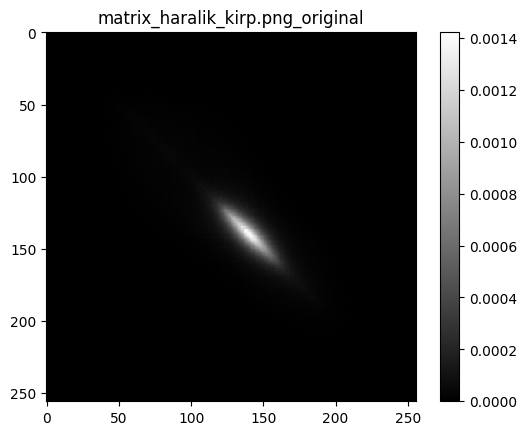

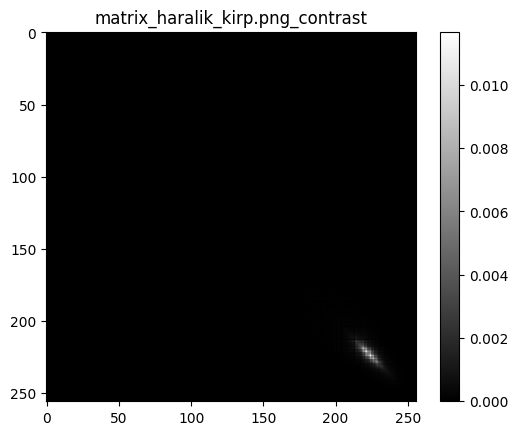

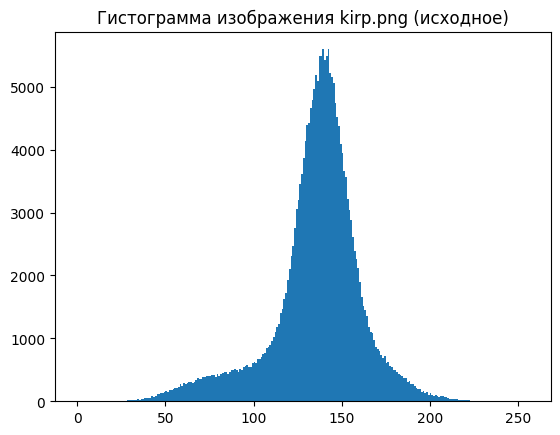

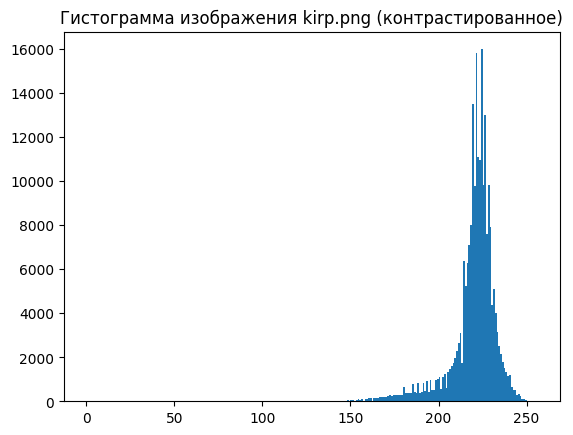

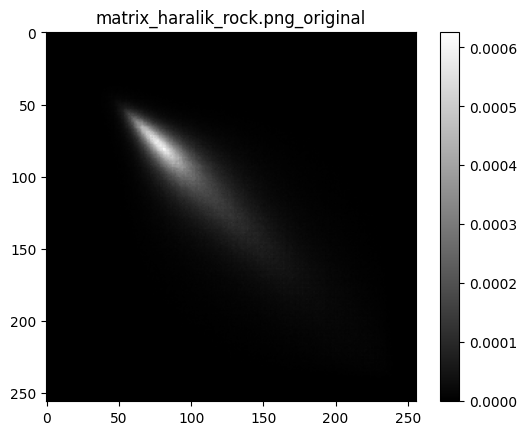

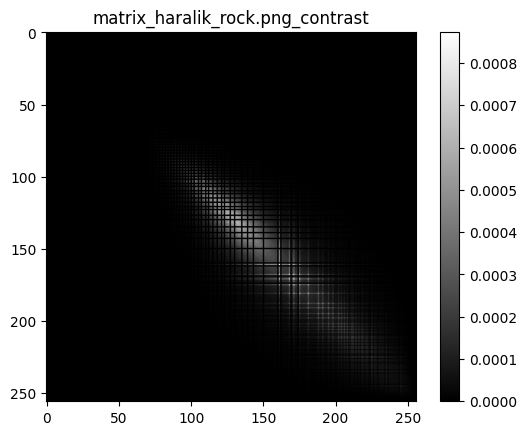

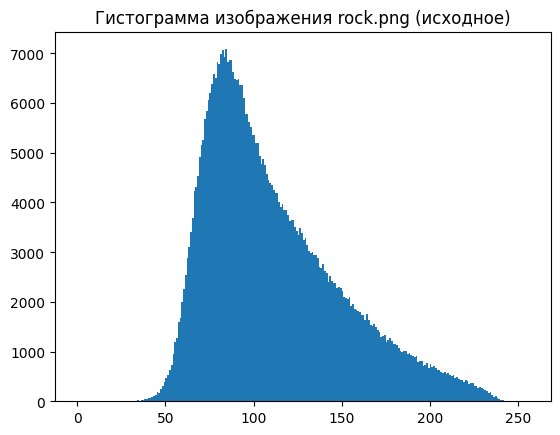

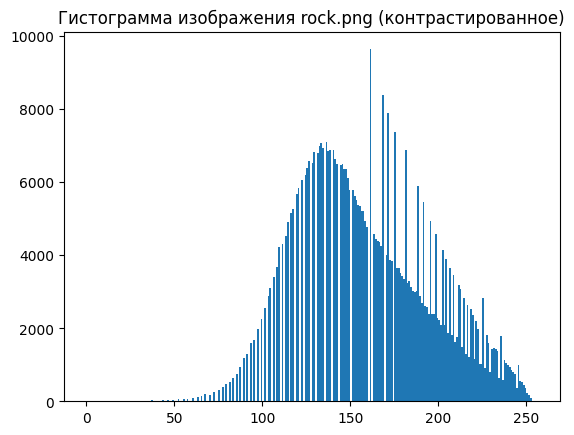

In [7]:
def main(smth=None):

    filename = ['kirp.png', 'rock.png']

    for i in range(len(filename)):

        img1 = to_grayscale(filename[i])

        glcm1 = build_glcm(img1)
        corr1 = calc_corr(glcm1)

        visualize_glcm(glcm1, f'matrix_haralik_{filename[i]}_original')

        img1_log = log_normalize(img1)

        glcm1_log = build_glcm(img1_log)
        corr1_log = calc_corr(glcm1_log)

        visualize_glcm(glcm1_log, f'matrix_haralik_{filename[i]}_contrast')

        img1_1 = Image.fromarray(img1)
        img1_1.save(f'img1_1_{filename[i]}')
        img1_2 = Image.fromarray(img1_log)
        img1_2.save(f'img1_2_{filename[i]}')

        plt.hist(img1.ravel(), 256, [0, 256])
        plt.title(f'Гистограмма изображения {filename[i]} (исходное)')
        plt.savefig(f'gist_1_original_{filename[i]}.png', bbox_inches='tight')
        plt.show()

        plt.hist(img1_log.ravel(), 256, [0, 256])
        plt.title(f'Гистограмма изображения {filename[i]} (контрастированное)')
        plt.savefig(f'gist_1_contrast_{filename[i]}.png', bbox_inches='tight')
        plt.show()


    with open(f"{filename[i][:-4]}_results.txt", "w", encoding="utf-8") as f:
        f.write(f'Признак корреляции для изображения {filename[i]} (исходное): {corr1}\n\n')
        f.write(f'Признак корреляции для изображения {filename[i]} (контрастированное): {corr1_log}')


if __name__ == "__main__":
    main()